In [1]:
import json
import pandas as pd

from NewsBiasClustering import NewsBiasClusteringFromMetrics

In [2]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
from collections import Counter


def display(metrics, labels, hasNeg = False):
    # Reduce Data Dimensions
    data = pd.DataFrame(metrics,columns=['sentiment','quoteBased','sensationalized','mudslinging','spin','informal'])
    scalar = StandardScaler()
    scaled_data = pd.DataFrame(scalar.fit_transform(data),columns=['sentiment','quoteBased','sensationalized','mudslinging','spin','informal']) #scaling the data
    #sns.heatmap(scaled_data.corr())
    pca = PCA(n_components = 2)
    pca.fit(scaled_data)
    data_pca = pca.transform(scaled_data)
    data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
    #sns.heatmap(data_pca.corr())

    # Output Clustered Graph
    for i in range(len(set(labels))):
        if hasNeg:
            i = i - 1
        pc1 = []
        pc2 = []
        for j in range(len(labels)):
            if labels[j] == i:
                pc1.append(data_pca.iloc[j]['PC1'])
                pc2.append(data_pca.iloc[j]['PC2'])
        plt.scatter(pc1,pc2,s=5) 
    plt.show()

In [3]:
print('Loading File')
file = open('rust-articles-backup-metrics.json', encoding='utf8')
articles = pd.DataFrame.from_dict(json.load(file))
print('File Loaded')

Loading File
File Loaded


independent
Counter({1: 9016, 0: 6555})


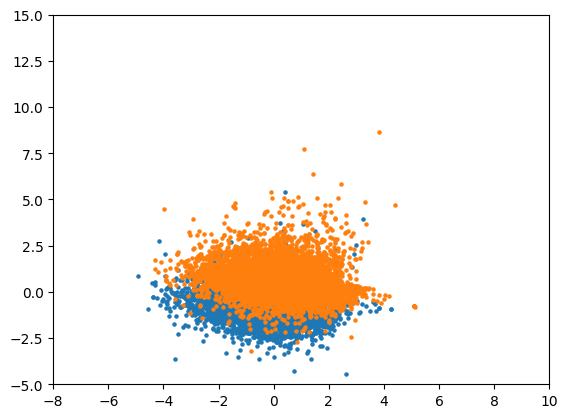

bbc
Counter({0: 5760, 1: 5158})


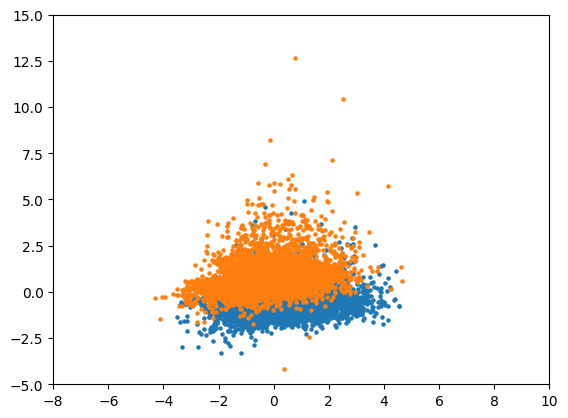

sky
Counter({0: 2611, 2: 1247, 1: 1128, 4: 542, 3: 457})


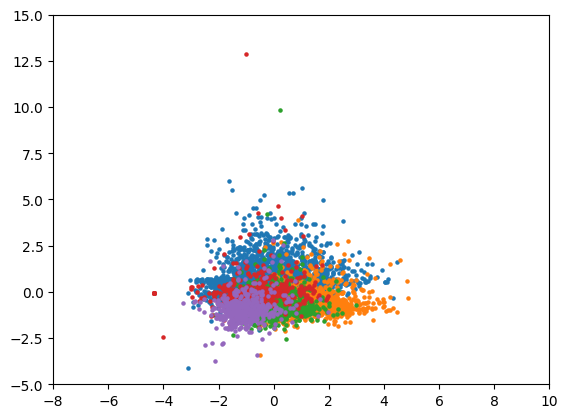

sun
Counter({0: 10750, 2: 10023, 1: 6426, 3: 5265})


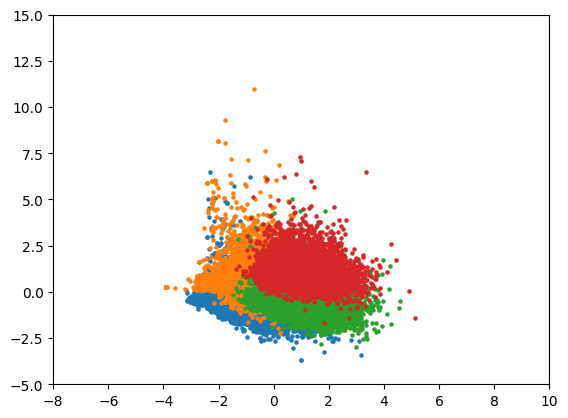

metro
Counter({0: 8817, 1: 6672})


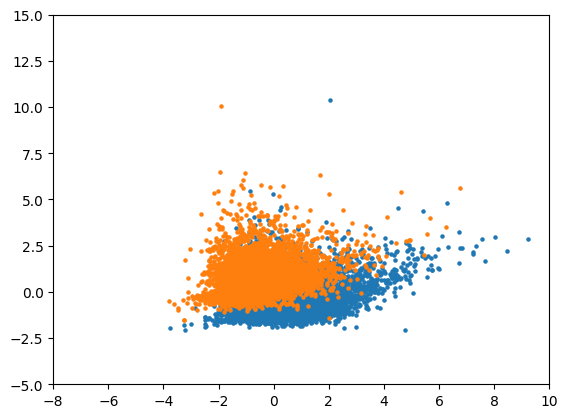

theguardian
Counter({1: 7889, 0: 6706})


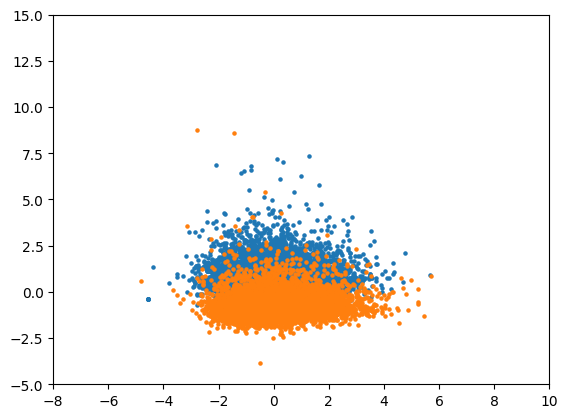

dailymail
Counter({1: 27525, 0: 24806})


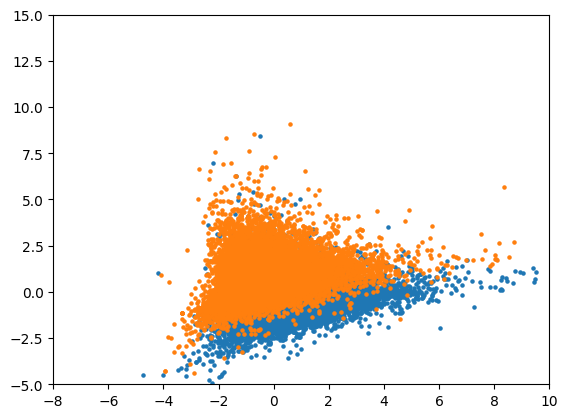

mirror
Counter({1: 7330, 0: 6542})


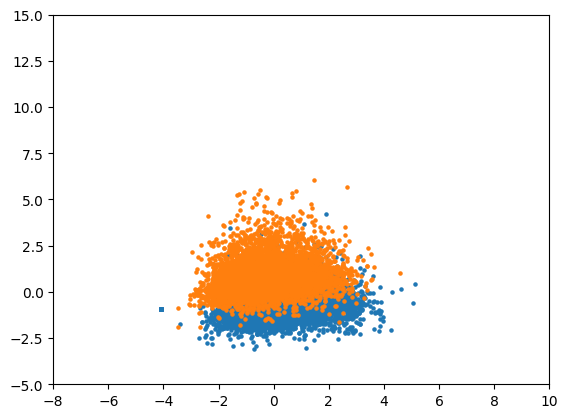

In [4]:
for publisher in list(set(articles['publisher'])):
    print(publisher)
    publisherArticles = articles[articles['publisher'] == publisher].reset_index(drop=True)
    metrics = []
    for i in range(len(publisherArticles)):
        sentiment = publisherArticles.iloc[i]['sentiment']
        quoteBased = publisherArticles.iloc[i]['quoteBased']
        sensationalized = publisherArticles.iloc[i]['sensationalized']
        mudslinging = publisherArticles.iloc[i]['mudslinging']
        spin = publisherArticles.iloc[i]['spin']
        informal = publisherArticles.iloc[i]['informal']
        metrics.append([sentiment, quoteBased, sensationalized, mudslinging, spin, informal])
    NewsBiasClusteringFromMetrics(metrics, threshold=0.32)